# PMR3508 - Dataset Adult

### Análise e predição de dados do Dataset Adult

Gustavo Nunes Ribeiro: PMR3508-2020-141

## 1. Bibliotecas

Primeiramente, importaremos algumas bibliotecas essencias para a análise dos dados: pandas e numpy.

In [1]:
import pandas as pd
import numpy as np

Para criar um modelo de predição, utilizaremos a biblioteca sklearn.

In [2]:
import sklearn

Para analisar os dados graficamente e numéricamente, utilizaremos as seguintes bibliotecas:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importação dos Dados

Para importar os dados, utilizaremos o comando `csv_read` a partir da biblioteca pandas.

In [4]:
train = pd.read_csv("../input/adult-pmr3508/train_data.csv",index_col=['Id'],na_values = '?')

Utilizando o comando `head`, podemos analisar as colunas e as primeiras linhas do dataset.

In [5]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


A partir do método `info`, pode-se comprender melhor as váriaveis com que trabalharemos.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 16280 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Pode-se notar a presença de dados com valores númericos e com valores não numéricos, além disso, a coluna "income" representa a nossa variável dependente. Tendo essas informações básicas, analisaremos mais afundo os dados existentes.

## 3. Análise dos dados

Utilizaremos o médoto `describe` para analisar as métricas que envolvem os dados.

In [7]:
train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Pode-se notar, através de uma análise prévia, a presença de outliers nas colunas "capital gain", "capital loss" e "hour per week", justamente por terem valores de máximo muito elevados.

Além disso, nota-se um desvio padrão elevado para as colunas "capital gain" e "capital loss", indicando a dispersão dos dados.


### 3. 1 Visualização dos Dados

#### 3.1.1 Dados Numéricos 

Nessa etapa, plotaremos uma série de gráficos que mostrarão como os dados estão organizados, como se relacionam com a variável dependente e como se relacionam entre si.

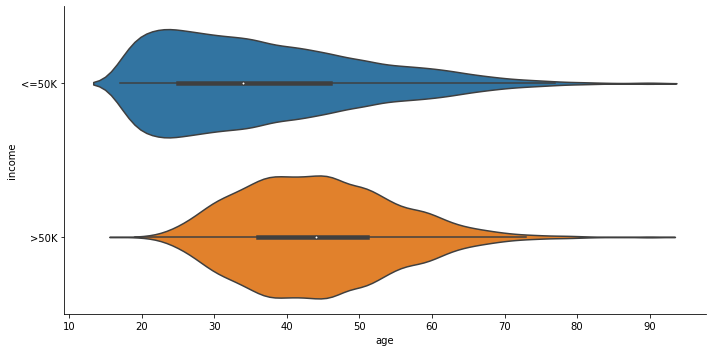

In [8]:
sns.catplot(x="age", y="income", kind="violin", data=train, aspect=2)

Nota-se que a idade é um fator considerável na definição do rótulo, já que as pessoas que ganham mais tendem a ser mais velhas.

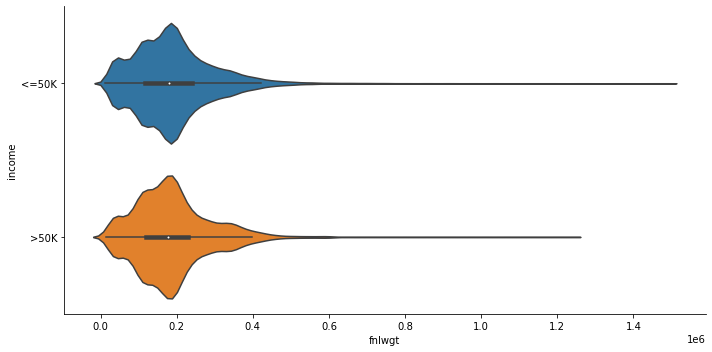

In [9]:
sns.catplot(x = "fnlwgt",y = "income", kind = "violin", data = train, aspect = 2)

É notável que se trata de uma variável pouco decisiva na escolha do rótulo "income", portanto, a coluna será "dropada" posteriormente.


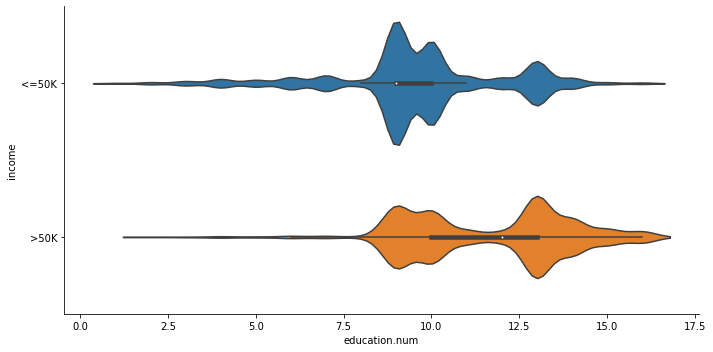

In [10]:
sns.catplot(x = "education.num",y = "income", kind = "violin", data = train, aspect = 2)

O gráfico demonstra uma relação clara entre o tempo de estudo e o rótulo "income".

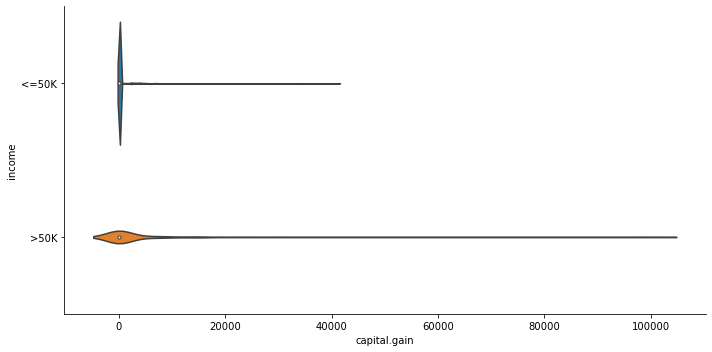

In [11]:
sns.catplot(x = "capital.gain",y = "income", kind = "violin", data = train, aspect = 2)

Para esse dado, nota-se uma grande desbalanceamento da distribuição, embora seja possível observar que há uma concentração massisa de pessoas que recebem menos de 50k em torno do valor 0 da abcissa. 

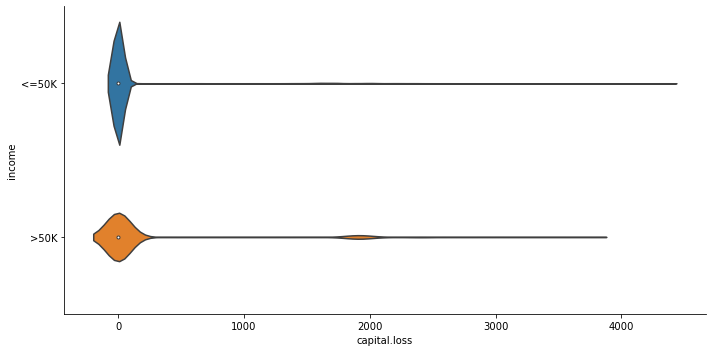

In [12]:
sns.catplot(x = "capital.loss",y = "income", kind = "violin", data = train, aspect = 2)

A mesma análise anterior pode ser feita para essa coluna.

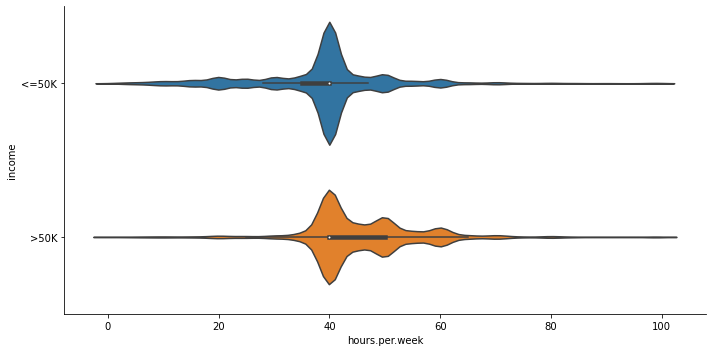

In [13]:
sns.catplot(x = "hours.per.week",y = "income", kind = "violin", data = train, aspect = 2)

Nota-se uma concentração de pessoas que trabalham em torno de 40 horas semanais. Além disso, para aquelas que recebem menos do que 50K, a "segunda maior" concentração é maior à esquerda do pico (menos do que 40 horas), já para aquelas que recebem mais do que 50K, essa concentração é maior à direita (mais do que 40 horas).

#### 3.1.2 Dados Categóricos

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

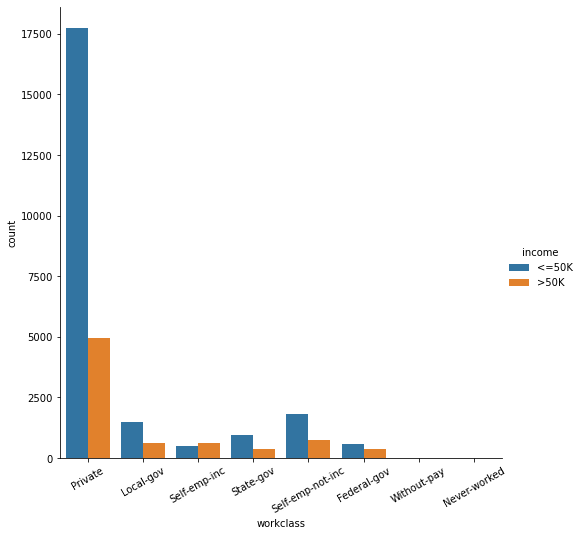

In [14]:
sns.catplot( x = "workclass", hue = "income", kind = "count", data = train, height=7, aspect=1)
plt.xticks(rotation=30)

Podemos observar um certo desbalanceamento dos dados, que estão mais concentrados no setor privado. Além disso, nota-se uma grande influência de cada categoria para o rótulo.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

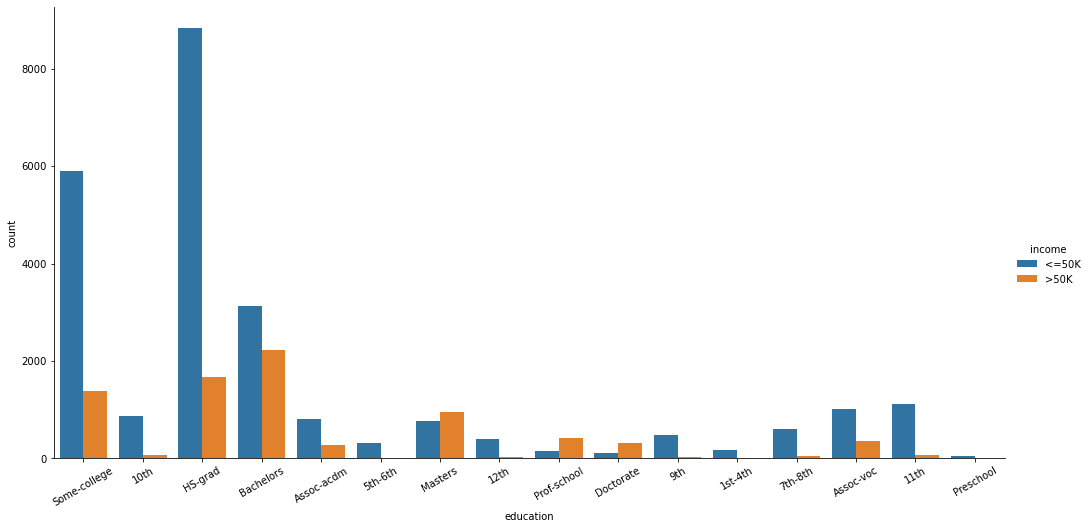

In [15]:
sns.catplot( x = "education", hue = "income", kind = "count", data = train, height=7, aspect=2)
plt.xticks(rotation=30)

Novamente, uma relação muito forte entre maior tempo de estudo e maior remuneração.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

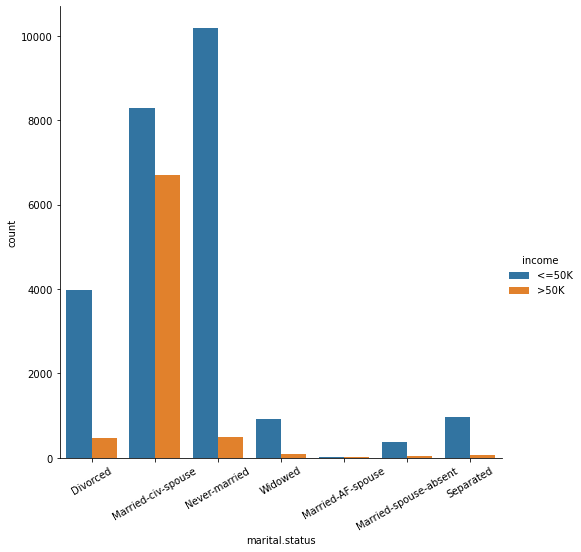

In [16]:
sns.catplot( x = "marital.status", hue = "income", kind = "count", data = train, height=7, aspect=1)
plt.xticks(rotation=30)

Nota-se uma tendência de pessoas civis casadas receberem mais de 50K em relação as outras classes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

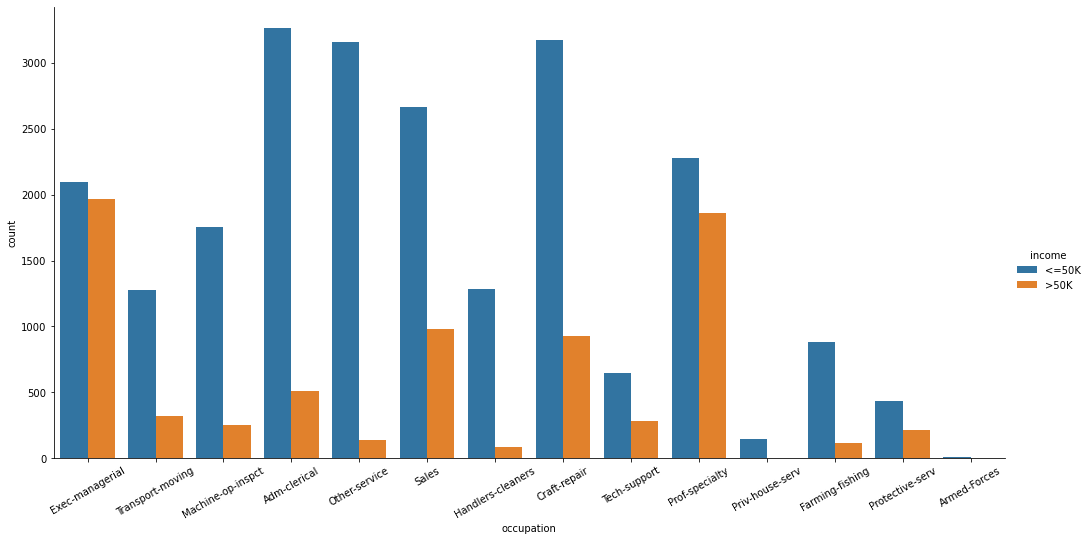

In [17]:
sns.catplot( x = "occupation", hue = "income", kind = "count", data = train, height=7, aspect=2)
plt.xticks(rotation=30)

Nota-se uma relação importante na definição da variável dependente.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

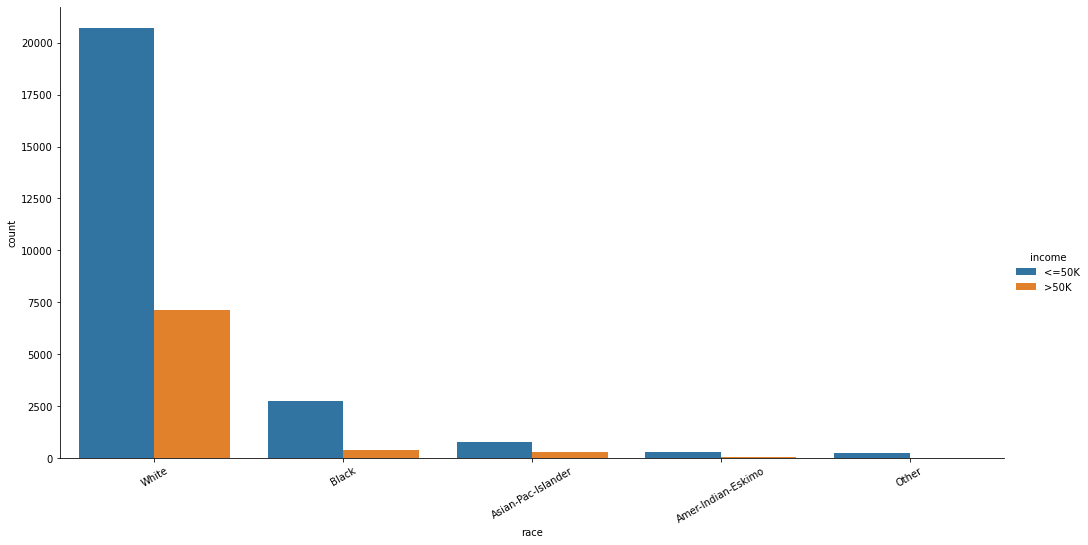

In [18]:
sns.catplot( x = "race", hue = "income", kind = "count", data = train, height=7, aspect=2)
plt.xticks(rotation=30)

Com esse gráfico, pode-se notar que a proporção de pessoas que recebem mais de 50K em relação em relação às pessoas que recebem menos de 50K é maior para a população branca e asiática, se comparada a população negra e a outras.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

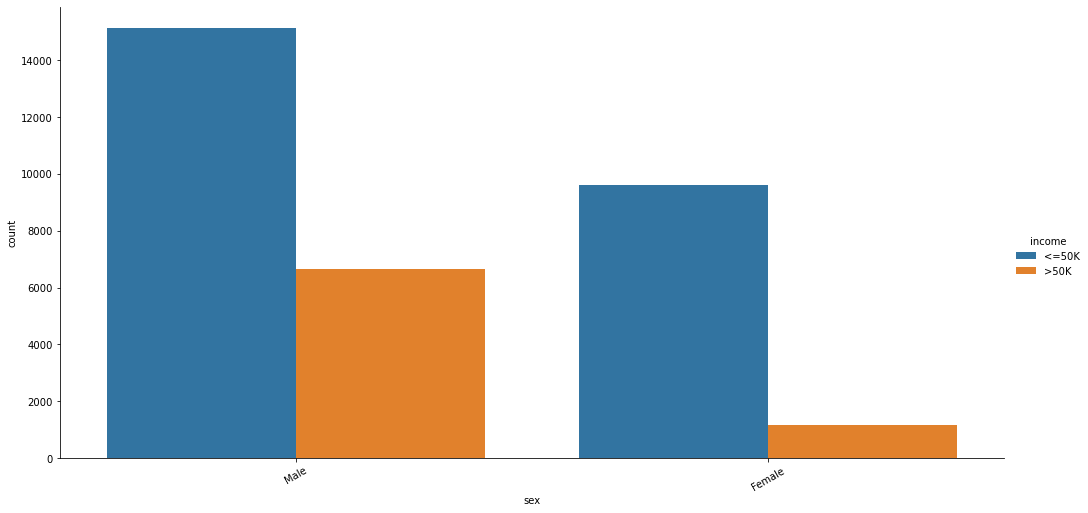

In [19]:
sns.catplot( x = "sex", hue = "income", kind = "count", data = train, height=7, aspect=2)
plt.xticks(rotation=30)

Nota-se uma desigualdade explícita entre a remuneração de homens e mulheres. Um homem possui maior chance de receber mais de 50K do que uma mulher.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

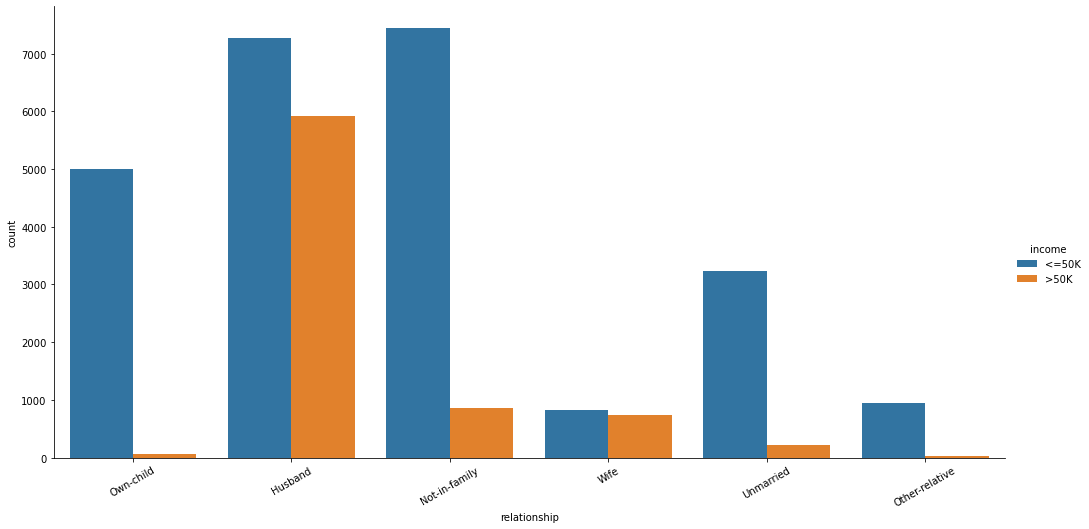

In [20]:
sns.catplot( x = "relationship", hue = "income", kind = "count", data = train, height=7, aspect=2)
plt.xticks(rotation=30)

Pela informações contidas, provavelmente possui forte correlação com a coluna "marital status".

In [21]:
train["native.country"].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Nota-se uma grande concentração dos dados nos Estados Unidos. Como está extremamente desbalanceada, provavelmente tiraremos da análise preditiva.

### 3. 2. Correlações

Nesse momento, analisaremos as relações presente entre os atributos.


In [22]:
train_corr = train.copy()

In [23]:
from sklearn.preprocessing import LabelEncoder

# Instanciando o LabelEncoder
le = LabelEncoder()

# Modificando o nosso dataframe, transformando a variável de classe em 0s e 1s
train_corr['income'] = le.fit_transform(train_corr['income'])

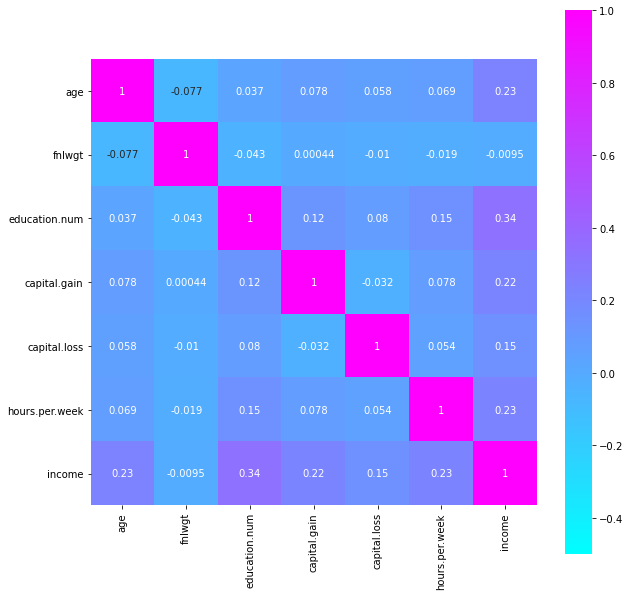

In [24]:
plt.figure(figsize=(10,10))

sns.heatmap(train_corr.corr(), square = True, annot=True, vmin=-0.5, vmax=1, cmap='cool')
plt.show()

Como a correlação entre a variável dependente "income" e a váriavel independente "fnlwgt" é baixíssima, podemos considerar que ambas não se relacionam para resolver o nosso problema.

## 4. Limpeza de dados

### 4. 1 Removendo Dados

Iniciaremos o processo de limpeza de dados removendo as linhas duplicadas (ou *duplicatas*).

In [25]:
train.drop_duplicates(keep='first', inplace=True)

Em seguida, "droparemos" duas colunas que analisamos como desprezíveis: 'fnlwgt' pela baixa correlação e 'native.country' pelo excessivo desbalanceamento.

In [26]:
train = train.drop(['fnlwgt', 'native.country','education'], axis = 1)

In [27]:
train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
Id,,,,,,,,,,,,
16280,34,Private,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,<=50K
16281,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,<=50K
16282,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,<=50K
16283,24,Private,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,<=50K
16284,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,>50K


### 4. 2. Divisão dos Dados

Agora, separaremos o nosso dataset em duas partes. A parte y conterá apenas a variável dependente "income", já a parte x, as variáveis dependentes

In [28]:
y_train = train.pop("income")
x_train = train

In [29]:
x_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
Id,,,,,,,,,,,
16280,34,Private,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44
16281,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40
16282,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42
16283,24,Private,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40
16284,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60


Seccionaremos o nosso dataset em 3 partes: numérica, esparsa e categórica.

In [30]:
numerical_cols = list(x_train.select_dtypes(include=[np.number]).columns.values)

numerical_cols.remove('capital.gain')
numerical_cols.remove('capital.loss')

sparse_cols = ['capital.gain','capital.loss']

categorical_cols = list(x_train.select_dtypes(exclude=[np.number]).columns.values)

print("Colunas numéricas: ", numerical_cols)
print("Colunas esparsas: ", sparse_cols)
print("Colunas categóricas: ", categorical_cols)

Colunas numéricas:  ['age', 'education.num', 'hours.per.week']
Colunas esparsas:  ['capital.gain', 'capital.loss']
Colunas categóricas:  ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex']


### 4. 3 Dados Faltantes


Para os dados faltantes, utilizaremos a classe `SimpleImputer` do scikit-learn. A estratégia adotada pelo método será substituir dados faltantes pelo valor de maior ocorrencia na coluna, ou seja, a moda.

In [31]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy='most_frequent')

#### 4. 3. 1. Dados Categóricos

Para transformar os dado categóricos em valores numéricos, utilizaremos o `OneHotEncoder` e, assim, nosso modelo de predição poderá interpretar corretamente esses valores.

In [32]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False)

Criaremos uma sequência de comandos (pipeline) para preencher os dados faltantes e tranformar os valores categórigo em numéricos.


In [33]:
from sklearn.pipeline import Pipeline

In [34]:
categorical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary'))])

#### 4. 3. 2. Dados Numéricos e esparsos

Para ambas as categorias, normalizaremos seus valores. Para os dados numéricos, utilizaremos o método `StandardScaler`, para os dados esparsos, `RobustScaler()`

In [35]:
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline(steps = [
    ('scaler', StandardScaler())
])

In [36]:
from sklearn.preprocessing import RobustScaler

sparse_pipeline = Pipeline(steps = [
    ('scaler', RobustScaler())
])

Por fim, utilizaremos o ColumnTransformer() para aplicar as pipelines as suas respectivas colunas do dataset.

In [37]:
from sklearn.compose import ColumnTransformer

# Cria o nosso Pré-Processador

# Cada pipeline está associada a suas respectivas colunas no dataset
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_pipeline, numerical_cols),
    ('spr', sparse_pipeline, sparse_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [38]:
x_train = preprocessor.fit_transform(x_train)

Neste caso, aproveitaremos para pré-processar os dados de teste que serão posteriormente utilizados.

In [39]:
test_data = pd.read_csv('../input/adult-pmr3508/test_data.csv',index_col=['Id'], na_values="?")

x_test = test_data.drop(['fnlwgt','education','native.country'], axis=1)

x_test = preprocessor.transform(x_test)

Para viabilizar a aplicação dos diferentes métodos de classificação, separaremos o nosso dataset em dois tipos de dados: de treino e de validação.

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

## 5. Modelos Preditivos

Como fator de comparação, manteremos o modelo preditivo elaborado com o classificador KNN e, em seguida, utilizaremos outros 4 modelos de classificação para explorar os diferentes métodos aprendidos ao longo do curso.

### 5. 1. KNN


Nessa etapa, utilizaremos o classificador KNN para lidar com nossos dados tratados. Partiremos de um valor de vizinhos `n_neighbors=10`. Em seguida, aplicaremos o método de validação cruzada para definir a acurácia do nosso classificador. 

In [41]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10)

score = cross_val_score(knn, x_train, y_train, cv = 5, scoring="accuracy")
print("Acurácia com cross validation:", score.mean())

Acurácia com cross validation: 0.8630030966511162


Com 10 vizinhos, alcançamos uma acurácia de aproximadamente 86.3%. No entanto, não sabemos se este é o melhor número de vizinhos para o problema, para isso, vasculharemos alguns números para tirarmos uma conclusão mais concreta.

In [42]:
# Quantidades de vizinhos a serem testadas
neighbors = [15, 20, 25]

# Dicionário para guardar as pontuações de cada hiperparâmetro
neighbors_scores = {}

for n_neighbors in neighbors:
    # Calcula a média de acurácia de cada classificador
    score = cross_val_score(KNeighborsClassifier(n_neighbors=n_neighbors), x_train, y_train, cv = 5, scoring="accuracy").mean()
    
    # Guarda essa acurácia
    neighbors_scores[n_neighbors] = score

# Obtém a quantidade de vizinhos com o melhor desempenho
best_n = max(neighbors_scores, key=neighbors_scores.get)

print("Melhor hiperparâmetro: ", best_n)
print("Melhor acurácia: ", neighbors_scores[best_n])

Melhor hiperparâmetro:  15
Melhor acurácia:  0.8662404573102126


### 5. 2. Random Forest Classifier

Iniciaremos o processo de classificação utilizando o modelo de classificação Random Forest implementado pelo pacote scikit-learn.

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Instancia nosso classificador
rfc = RandomForestClassifier(random_state=42)

Para obter os hiperparâmetros ideais para a maximização dos resultados, utilizaremos o código a seguir:

In [44]:
from skopt import BayesSearchCV

from skopt.space import Integer, Real

# Cria o Bayes Search:
rfc_search_cv = BayesSearchCV(estimator = rfc,
                              search_spaces = {'n_estimators': Integer(100, 500),
                                               'criterion': ['gini', 'entropy'],
                                               'max_depth': Integer(1, 50),},
                              cv = 5,
                              n_iter = 20, n_jobs=-1, random_state=42)

# Realizando a otimização por BayesSearch:
%timeit -n 1 -r 1 rfc_search_cv.fit(x_train, y_train)

print('Melhores hiperparâmetros: {}'.format(rfc_search_cv.best_params_))
print('Desempenho do melhor modelo: {}'.format(round(rfc_search_cv.best_score_,5)))

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


41min 33s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Melhores hiperparâmetros: OrderedDict([('criterion', 'gini'), ('max_depth', 18), ('n_estimators', 500)])
Desempenho do melhor modelo: 0.86423


### 5. 3. Support Vector Classifier


Outro método que será utilizado é o SVM, implementado pelo scikit-learn.

In [45]:
from sklearn.svm import SVC

svc = SVC(random_state=42, probability=True)

Para hiperparâmetros padrões, observamos o seguinte resultado:

In [46]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(svc, x_train, y_train, cv = 4, scoring="accuracy")
print("Acurácia com cross validation:", score.mean())

Acurácia com cross validation: 0.8012457108616969


A fim de otimizar o algorítmo, buscamos os hiperparâmetros que otimizam a efetividade.

In [47]:
# Importa o Bayes Search:
from skopt import BayesSearchCV



# Cria o Bayes Search:
svc_search_cv = BayesSearchCV(estimator = svc,
                              search_spaces = {'C': Real(1e-2, 20),
                                               'gamma': ['scale', 'auto'],},
                              cv = 2,
                              n_iter = 15, n_jobs=-1, random_state=42)

# Realizando a otimização por BayesSearch:
%timeit -n 1 -r 1 svc_search_cv.fit(x_train, y_train)

print('Melhores hiperparâmetros: {}'.format(svc_search_cv.best_params_))
print('Desempenho do melhor modelo: {}'.format(round(svc_search_cv.best_score_,5)))

14min 3s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Melhores hiperparâmetros: OrderedDict([('C', 16.249795807263695), ('gamma', 'auto')])
Desempenho do melhor modelo: 0.87054


### 5. 4. XGBoost

O XGBoost consiste em um método de boosting (aprendido ao longo do curso), cujos resultados de classificação tendem a ser bem efetivos. Para iniciar o processo, utilizaremos a classe XGBClassifier da biblioteca xgboost.

In [48]:
from xgboost import XGBClassifier

# Instancia nosso classificador
xgb = XGBClassifier(random_state=42)

Para o obter os hiperparâmetros, faz-se:

In [49]:
# Cria o Bayes Search:
xgb_search_cv = BayesSearchCV(estimator = xgb,
                              search_spaces = {'n_estimators': Integer(10, 500),
                                               'learning_rate': Real(1e-3, 1),
                                               'max_depth': Integer(1, 20),
                                               'reg_alpha': Real(1e-14, 1e1, prior = 'log-uniform'),
                                               'reg_lambda': Real(1e-14, 1e1, prior = 'log-uniform'),},
                              cv = 5,
                              n_iter = 75, n_jobs=-1, random_state=42)

# Realizando a otimização por BayesSearch:
%timeit -n 1 -r 1 xgb_search_cv.fit(x_train, y_train)

print('Melhores hiperparâmetros: {}'.format(xgb_search_cv.best_params_))
print('Desempenho do melhor modelo: {}'.format(round(xgb_search_cv.best_score_,5)))

27min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Melhores hiperparâmetros: OrderedDict([('learning_rate', 0.5158989671882724), ('max_depth', 2), ('n_estimators', 500), ('reg_alpha', 1e-14), ('reg_lambda', 10.0)])
Desempenho do melhor modelo: 0.87362


### 5. 5. Rede Neural

Outro método visto ao longo do curso é o de redes neurais. Para aplicá-lo, utilizaremos a biblioteca scikit-learn, como foi feito no terceiro exercício programa da disciplina.

In [50]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, early_stopping=True)

Otimizando seus hiperparâmetros:

In [51]:
from scipy.stats import loguniform as sp_loguniform
from sklearn.model_selection import RandomizedSearchCV

# Hiperparâmetros a serem otimizados
hyperparams = {'hidden_layer_sizes': [(2 ** i, 2 ** j) for j in np.arange(5, 8) for i in np.arange(4, 7)],
               'alpha': sp_loguniform(1e-10, 1e-1),
               'learning_rate': ['constant','adaptive']}

# Busca de Hiperparâmetros
mlp_search_cv = RandomizedSearchCV(mlp, hyperparams, scoring='accuracy', n_iter=25, cv=3, n_jobs=-1, random_state=42)
%timeit -n 1 -r 1 mlp_search_cv.fit(x_train, y_train)

print('Melhores hiperparâmetros: {}'.format(mlp_search_cv.best_params_))
print('Desempenho do melhor modelo: {}'.format(round(mlp_search_cv.best_score_,5)))

5min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Melhores hiperparâmetros: {'alpha': 8.471746987003677e-08, 'hidden_layer_sizes': (32, 32), 'learning_rate': 'constant'}
Desempenho do melhor modelo: 0.85698


### 5. 6. Comparação

Para comparar os diferente métodos de classificação, exploraremos os valores estipulados pela acurácia e AUC. Dessa forma, será possível estabelecer o melhor modelo para a classificação desejada.

Instanciaremos um LabelEncoder para transformar as classses em números inteiros.

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Os valores para os diferentes métodos podem ser observados abaixo.

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

rfc_roc_auc = roc_auc_score(le.fit_transform(y_valid), rfc_search_cv.predict_proba(x_valid)[:,1])
rfc_acc = accuracy_score(y_valid, rfc_search_cv.predict(x_valid))
print("Random Forest:")
print('AUC -------- Random Forest: {:.4f}'.format(rfc_roc_auc))
print('Acurácia --- Random Forest: {:.4f}'.format(rfc_acc))
print('')

svc_roc_auc = roc_auc_score(le.fit_transform(y_valid), svc_search_cv.predict_proba(x_valid)[:,1])
svc_acc = accuracy_score(y_valid, svc_search_cv.predict(x_valid))
print("Support Vector Classifier:")
print('AUC -------- SVC: {:.4f}'.format(svc_roc_auc))
print('Acurácia --- SVC: {:.4f}'.format(svc_acc))
print('')


xgb_roc_auc = roc_auc_score(le.fit_transform(y_valid), xgb_search_cv.predict_proba(x_valid)[:,1])
xgb_acc = accuracy_score(y_valid, xgb_search_cv.predict(x_valid))
print('Extreme Gradient Boosting:')
print('AUC -------- XGBoost: {:.4f}'.format(xgb_roc_auc))
print('Acurácia --- XGBoost: {:.4f}'.format(xgb_acc))
print('')

mlp_roc_auc = roc_auc_score(le.fit_transform(y_valid), mlp_search_cv.predict_proba(x_valid)[:,1])
mlp_acc = accuracy_score(y_valid, mlp_search_cv.predict(x_valid))
print('Rede Neural:')
print('AUC -------- Rede Neural: {:.4f}'.format(mlp_roc_auc))
print('Acurácia --- Rede Neural: {:.4f}'.format(mlp_acc))

Random Forest:
AUC -------- Random Forest: 0.9175
Acurácia --- Random Forest: 0.8646

Support Vector Classifier:
AUC -------- SVC: 0.9052
Acurácia --- SVC: 0.8701

Extreme Gradient Boosting:
AUC -------- XGBoost: 0.9290
Acurácia --- XGBoost: 0.8723

Rede Neural:
AUC -------- Rede Neural: 0.9104
Acurácia --- Rede Neural: 0.8562


Observa-se, por fim, que o modelo de Extreme Gradient Boosting obteve melhores resultados, uma vez que a acurácia e a AUC do mesmo foram as maiores entre todos os outros.

### 5. 7. Dados de teste

Nesse momento, utilizaremos o nosso classificador XGBoost para predizer os dados de teste, para assim, submeter à plataforma.

In [54]:
test_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
Id,,,,,,,,,,,,,,
0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [55]:
predictions = xgb_search_cv.predict(x_test)

Por fim:

In [56]:
predictions

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

## 6. Submissão 

Nessa etapa, precisa-se criar um arquivo **.csv** para submeter ao Kaggle. Criaremos, então, um Dataframe e, a partir deste, incluiremos as colunas "Id" e "income". Por fim, salvaremos o arquivos.

In [57]:
submission = pd.DataFrame ()

In [58]:
submission[0] = test_data.index
submission[1] = predictions
submission.columns = ['Id','income']

In [59]:
submission.head()

,Id,income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K


In [60]:
submission.to_csv('submission.csv',index = False)